# Linear Algebra for Data science
## Chapter 12

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

plt.rcParams['figure.figsize'] = [12, 8]

In [4]:
d = fetch_ucirepo(id=560)

In [5]:
df = d.data.features 

In [6]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


In [7]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday'],
      dtype='object')

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

C:\Users\rfakhrutdinov\AppData\Local\Temp\ipykernel_10636\1667525368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [9]:
df.dtypes

Date                     datetime64[ns]
Rented Bike Count                 int64
Hour                              int64
Temperature                     float64
Humidity                          int64
Wind speed                      float64
Visibility                        int64
Dew point temperature           float64
Solar Radiation                 float64
Rainfall                        float64
Snowfall                        float64
Seasons                          object
Holiday                          object
dtype: object

In [10]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday'],
      dtype='object')

<AxesSubplot:xlabel='Temperature', ylabel='Rented Bike Count'>

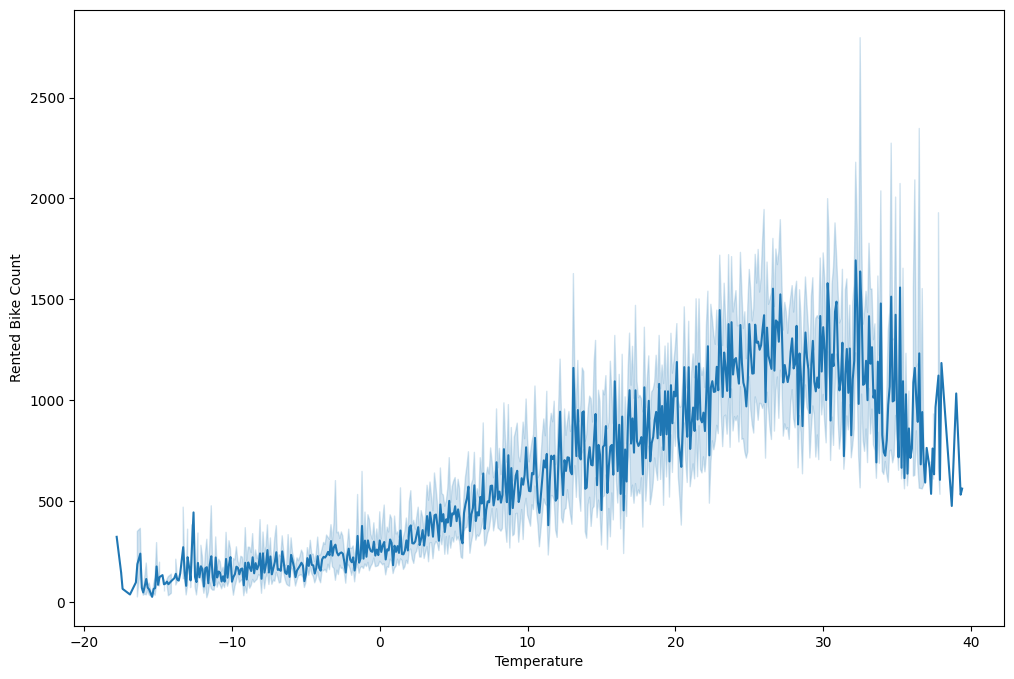

In [11]:
sns.lineplot(data=df, x='Temperature', y='Rented Bike Count')

<AxesSubplot:>

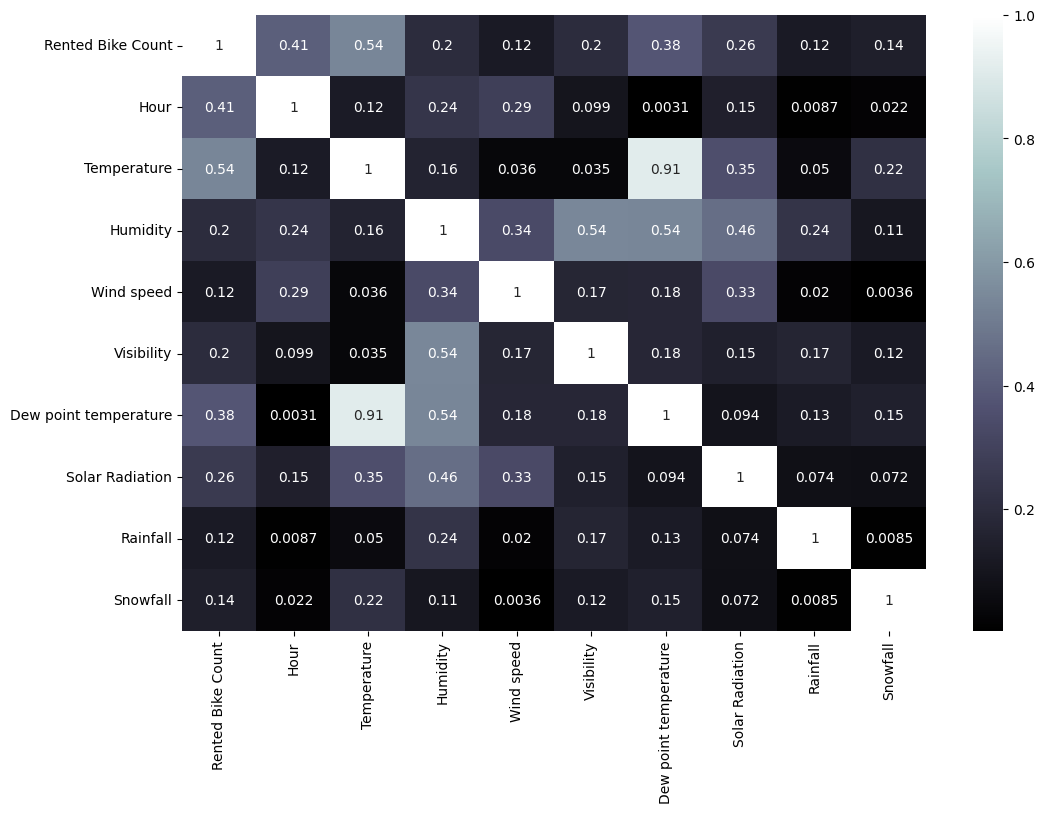

In [12]:
sns.heatmap(df[['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall']].corr().abs(), cmap='bone', annot=True)

<AxesSubplot:>

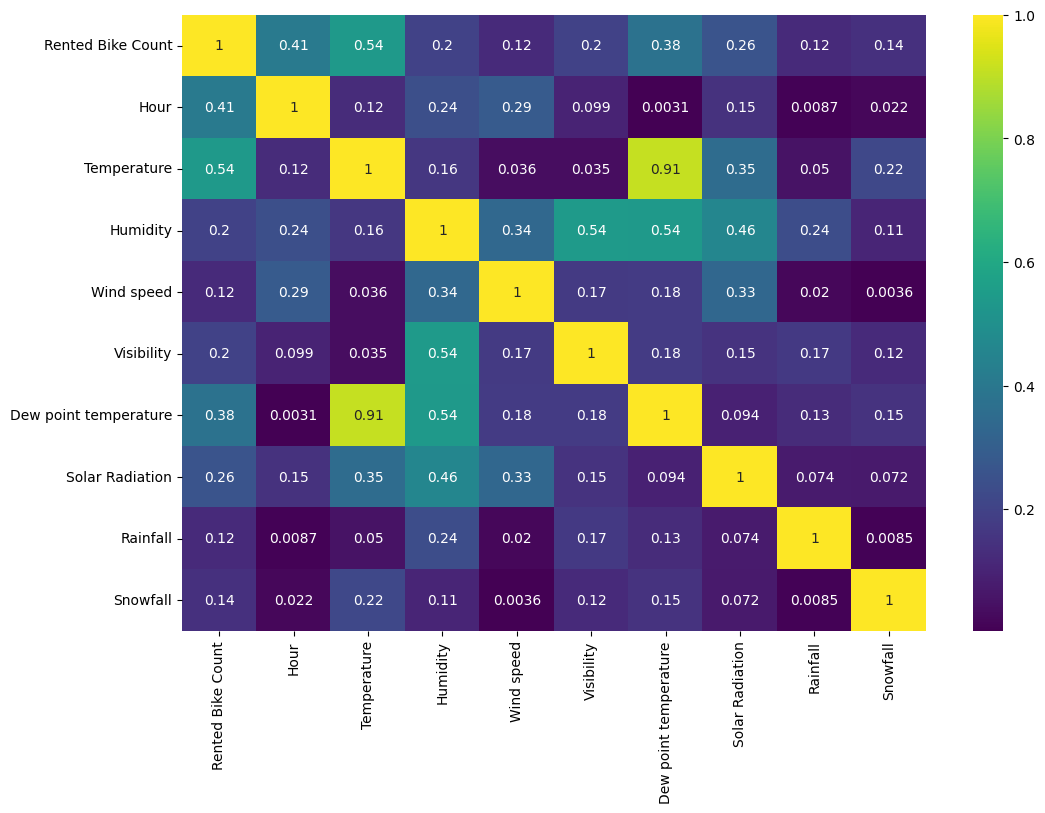

In [13]:
sns.heatmap(df[['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall']].corr().abs(), cmap='viridis', annot=True)

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

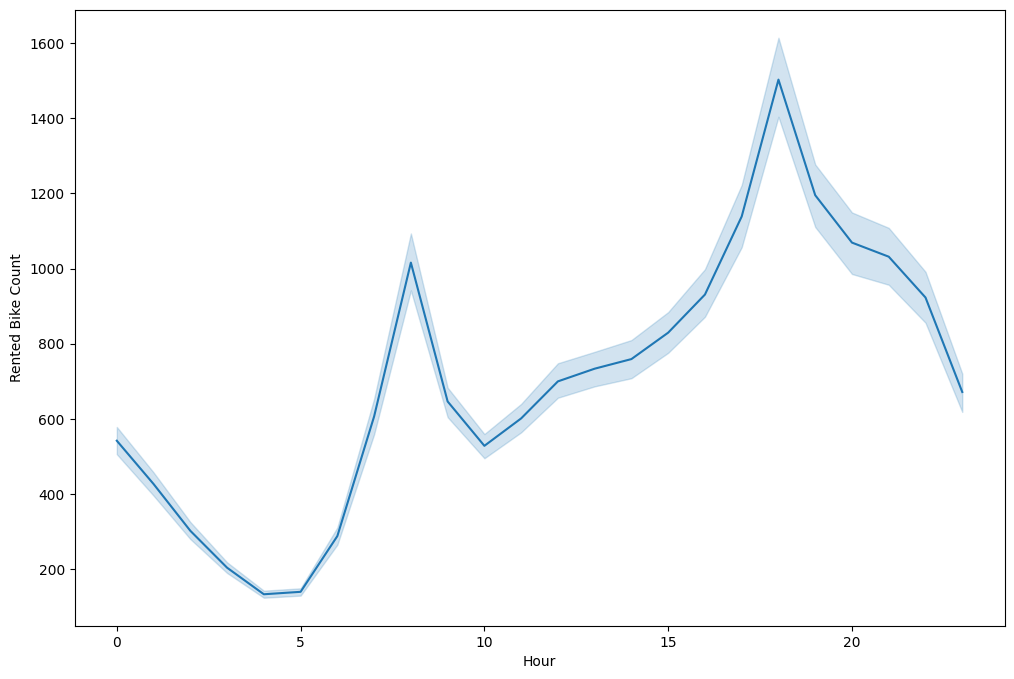

In [14]:
sns.lineplot(data=df, x='Hour', y='Rented Bike Count')

<AxesSubplot:xlabel='Temperature', ylabel='Dew point temperature'>

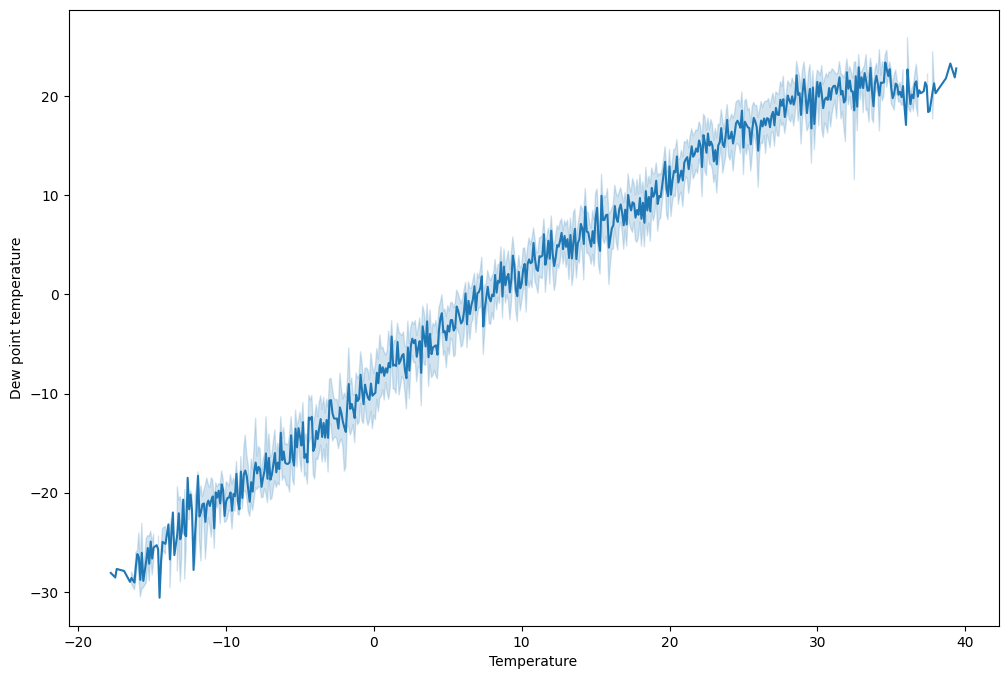

In [15]:
sns.lineplot(data=df, x='Temperature', y='Dew point temperature')

In [16]:
# First, let's find linear model for temperature and dew point temperature

X = sm.add_constant(df['Temperature'].copy())
Y = df['Dew point temperature']

In [17]:
model_t = sm.OLS(Y, X)
results_t = model_t.fit()
results_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Dew point temperature   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.833
Method:                    Least Squares   F-statistic:                 4.375e+04
Date:                   Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                           11:17:35   Log-Likelihood:                -27095.
No. Observations:                   8760   AIC:                         5.419e+04
Df Residuals:                       8758   BIC:                         5.421e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.7839      0.084   -104.785      0.000      -8.948      -8.620
Temperature     0.9980      0.005    209.161      0.000       0.989       1.007
==============================================================================
Omnibus:                      417.007   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              478.943
Skew:                          -0.573   Prob(JB):                    9.97e-105
Kurtosis:                       2.977   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Linear regression for Temperature and Hour

X = sm.add_constant(df[['Temperature', 'Hour']].copy())

In [19]:
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Dew point temperature   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                 2.397e+04
Date:                   Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                           11:17:35   Log-Likelihood:                -26758.
No. Observations:                   8760   AIC:                         5.352e+04
Df Residuals:                       8757   BIC:                         5.354e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.5505      0.117    -56.095      0.000      -6.779      -6.322
Temperature     1.0132      0.005    218.947      0.000       1.004       1.022
Hour           -0.2112      0.008    -26.453      0.000      -0.227      -0.196
==============================================================================
Omnibus:                      314.409   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.424
Skew:                          -0.486   Prob(JB):                     2.19e-76
Kurtosis:                       3.097   Cond. No.                         43.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Let's play with polyfit

In [21]:
# Linear regression for wind speed, solar radiation (bad model)

X = sm.add_constant(df[['Wind speed', 'Solar Radiation']].copy())

bad_model = sm.OLS(Y, X)
bad_results = bad_model.fit()
bad_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Dew point temperature   R-squared:                       0.057
Model:                               OLS   Adj. R-squared:                  0.057
Method:                    Least Squares   F-statistic:                     267.0
Date:                   Mon, 26 Aug 2024   Prob (F-statistic):          2.84e-113
Time:                           11:17:35   Log-Likelihood:                -34680.
No. Observations:                   8760   AIC:                         6.937e+04
Df Residuals:                       8757   BIC:                         6.939e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.6812      0.264     29.150      0.000       7.165       8.198
Wind speed         -2.9446      0.139    -21.241      0.000      -3.216      -2.673
Solar Radiation     2.5860      0.165     15.638      0.000       2.262       2.910
==============================================================================
Omnibus:                      736.688   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.028
Skew:                          -0.239   Prob(JB):                     2.60e-66
Kurtosis:                       2.226   Cond. No.                         4.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercise 12.1

In [22]:
# Adding seasonality

df['is_summer'] = df['Seasons'].isin(['Summer', 'Spring']).astype('float')

In [23]:
X

,const,Wind speed,Solar Radiation
0,1.0,2.2,0.0
1,1.0,0.8,0.0
2,1.0,1.0,0.0
3,1.0,0.9,0.0
4,1.0,2.3,0.0
...,...,...,...
8755,1.0,2.6,0.0
8756,1.0,2.3,0.0
8757,1.0,0.3,0.0
8758,1.0,1.0,0.0


In [24]:
X = sm.add_constant(df[['is_summer', 'Rainfall']])
Y = df['Rented Bike Count']

model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     468.8
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          3.80e-194
Time:                        11:17:35   Log-Likelihood:                -68654.
No. Observations:                8760   AIC:                         1.373e+05
Df Residuals:                    8757   BIC:                         1.373e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        530.4946      9.313     56.963      0.000     512.239     548.750
is_summer    369.1267     13.127     28.121      0.000     343.395     394.858
Rainfall     -80.5237      5.818    -13.841      0.000     -91.928     -69.120
==============================================================================
Omnibus:                     1497.901   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2435.082
Skew:                           1.168   Prob(JB):                         0.00
Kurtosis:                       4.104   Cond. No.                         2.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
X = sm.add_constant(df.query('Rainfall != 0')[['is_summer', 'Rainfall']])
Y = df.query('Rainfall != 0')['Rented Bike Count']

model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     7.618
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           0.000548
Time:                        11:17:35   Log-Likelihood:                -3681.4
No. Observations:                 528   AIC:                             7369.
Df Residuals:                     525   BIC:                             7382.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1169     22.954      6.627      0.000     107.024     197.210
is_summer     48.4300     25.520      1.898      0.058      -1.704      98.564
Rainfall      -9.8300      2.871     -3.424      0.001     -15.470      -4.190
==============================================================================
Omnibus:                      471.637   Durbin-Watson:                   0.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12374.333
Skew:                           3.914   Prob(JB):                         0.00
Kurtosis:                      25.387   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Only marginally better

## Exercise 12.2

In [27]:
X = sm.add_constant(df[['Temperature', 'Rainfall']])
Y = df['Rented Bike Count']

model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     1992.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:17:35   Log-Likelihood:                -67458.
No. Observations:                8760   AIC:                         1.349e+05
Df Residuals:                    8757   BIC:                         1.349e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         337.4833      8.416     40.099      0.000     320.986     353.981
Temperature    29.4898      0.479     61.565      0.000      28.551      30.429
Rainfall      -86.0617      5.071    -16.970      0.000     -96.003     -76.120
==============================================================================
Omnibus:                     1040.513   Durbin-Watson:                   0.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1607.908
Skew:                           0.858   Prob(JB):                         0.00
Kurtosis:                       4.210   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

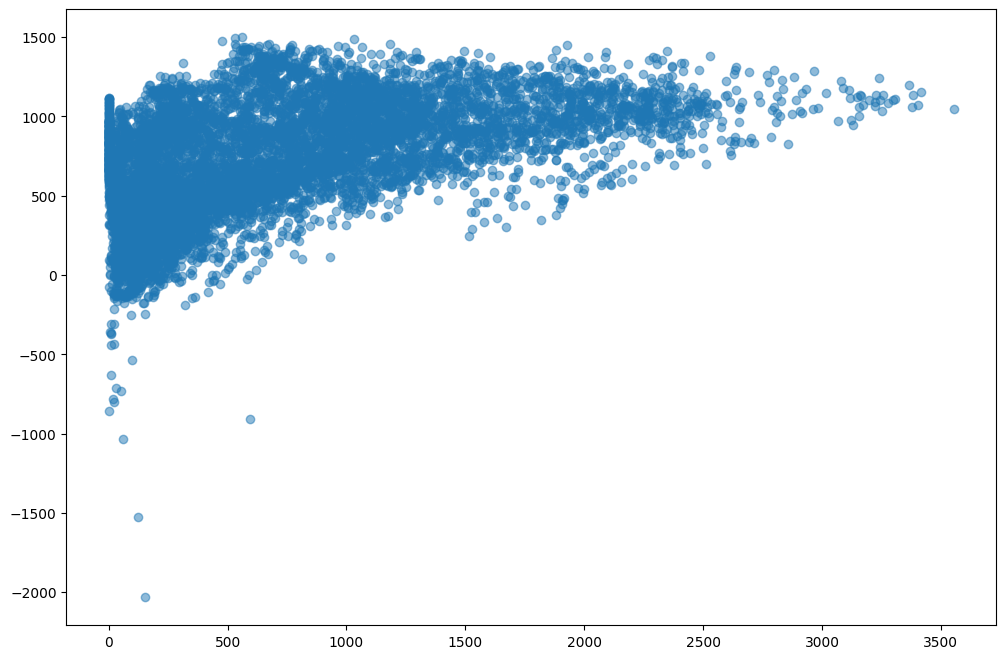

In [28]:
plt.plot(df['Rented Bike Count'], (X @ results.params), 'o', alpha=0.5, )

## Exercise 12.3

In [29]:
X = sm.add_constant(df[['Rainfall', 'Temperature']])
Y = df['Rented Bike Count'].to_numpy()

In [30]:
X['lincomb'] = 0.4*X.Temperature + 4*X.Rainfall

In [31]:
X = X.to_numpy()

<AxesSubplot:>

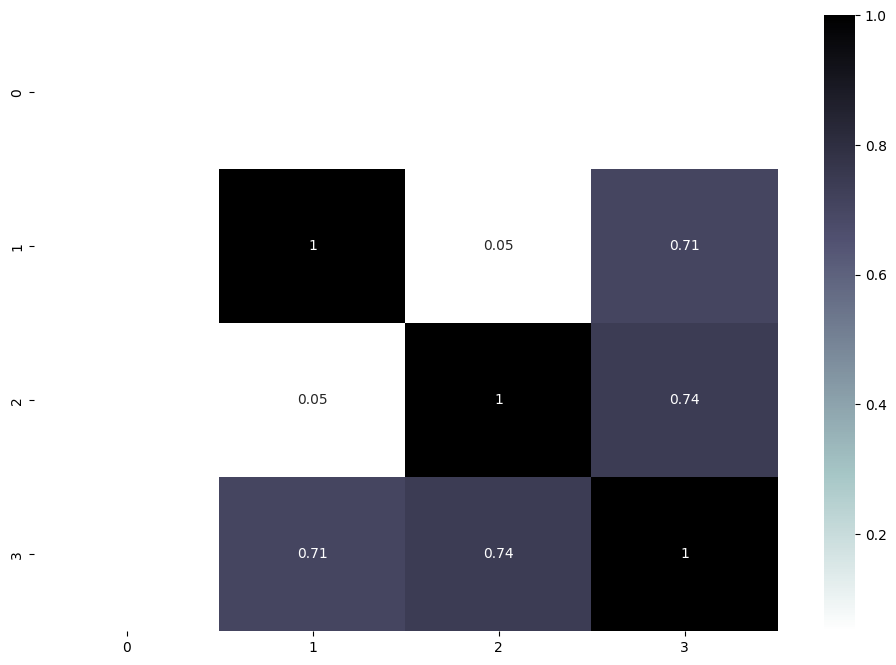

In [32]:
sns.heatmap(pd.DataFrame(X).corr().abs(), cmap='bone_r', annot=True)

In [33]:
pd.DataFrame(X).corr()

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,1.000000,0.050282,0.705704
2,NaN,0.050282,1.000000,0.743094
3,NaN,0.705704,0.743094,1.000000


In [34]:
# via statsmodels

model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     1992.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:17:36   Log-Likelihood:                -67458.
No. Observations:                8760   AIC:                         1.349e+05
Df Residuals:                    8757   BIC:                         1.349e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        337.4833      8.416     40.099      0.000     320.986     353.981
x1            -8.5673      0.348    -24.623      0.000      -9.249      -7.885
x2            37.2393      0.687     54.241      0.000      35.893      38.585
x3           -19.3736      1.182    -16.395      0.000     -21.690     -17.057
==============================================================================
Omnibus:                     1040.513   Durbin-Watson:                   0.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1607.908
Skew:                           0.858   Prob(JB):                         0.00
Kurtosis:                       4.210   Cond. No.                     2.24e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.47e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
b_correct = results.params

1 - (X@b_correct -  Y).var() / Y.var()

0.31264815424868986

In [36]:
# via inverted matrix

b_wrong = np.linalg.inv(X.T @ X) @ X.T @ Y
b_wrong

array([ 960.87367331, -122.95771948,  -22.38028315,   89.24410309])

In [37]:
Y_wrong = X @ b_wrong

In [38]:
np.linalg.lstsq(X, Y, rcond=1e-5)

(array([337.48329388,  -8.56732457,  37.23925633, -19.37359576]),
 array([], dtype=float64),
 3,
 array([1.80190080e+03, 3.99482785e+02, 6.34964962e+01, 8.04075738e-13]))

In [39]:
np.corrcoef(Y.T,Y_wrong.T)[0,1]**2

0.028495888048241304

## Exercise 12.4

In [40]:
np.linalg.matrix_rank(X)

3

In [41]:
print(f'размер inv(XtX + 0.0*I):{(X.T @ X).shape}\nранг inv(XtX + 0.0*I):{np.linalg.matrix_rank(X.T @ X)}')

размер inv(XtX + 0.0*I):(4, 4)
ранг inv(XtX + 0.0*I):3


In [42]:
S = (X.T @ X + 0.01 * np.eye(4))

In [43]:
Si = np.linalg.inv(S)

In [44]:
print(f'размер inv(XtX + 0.01*I):{Si.shape}\nранг inv(XtX + 0.01*I):{np.linalg.matrix_rank(Si)}')

размер inv(XtX + 0.01*I):(4, 4)
ранг inv(XtX + 0.01*I):4


In [45]:
X_0 = df[['Rainfall', 'Temperature', ]]
X_0['const'] = 1
X_0['lincomb'] = 0.4*X_0.Temperature + 4*X_0.Rainfall
X_0

X_1 = sm.add_constant(df[['Temperature', 'Rainfall']])

Y = df['Rented Bike Count']

C:\Users\rfakhrutdinov\AppData\Local\Temp\ipykernel_10636\2716538035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_0['const'] = 1
C:\Users\rfakhrutdinov\AppData\Local\Temp\ipykernel_10636\2716538035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_0['lincomb'] = 0.4*X_0.Temperature + 4*X_0.Rainfall


In [46]:
X_0.corr()

,Rainfall,Temperature,const,lincomb
Rainfall,1.000000,0.050282,NaN,0.705704
Temperature,0.050282,1.000000,NaN,0.743094
const,NaN,NaN,NaN,NaN
lincomb,0.705704,0.743094,NaN,1.000000


In [47]:
l_0 = []
l_1 = []

for i in np.linspace(0, 0.2, 40):
    shift_0 = i * np.linalg.norm(X_0)**2
    shift_1 = i * np.linalg.norm(X_1)**2
    
    S = X_0.T @ X_0 + shift_0 * np.eye((X_0.T @ X_0).shape[0])
    N = X_1.T @ X_1 + shift_1 * np.eye((X_1.T @ X_1).shape[0])
    
    
    b0 = np.linalg.inv(S) @ X_0.T @ Y
    b1 = np.linalg.inv(N) @ X_1.T @ Y
    
    Y_0 = X_0.to_numpy() @ b0
    Y_1 = X_1.to_numpy() @ b1
    
    r_0 = np.corrcoef(Y, Y_0)[0,1]**2
    r_1 = np.corrcoef(Y, Y_1)[0,1]**2
    
    l_0.append(r_0)
    l_1.append(r_1)
    

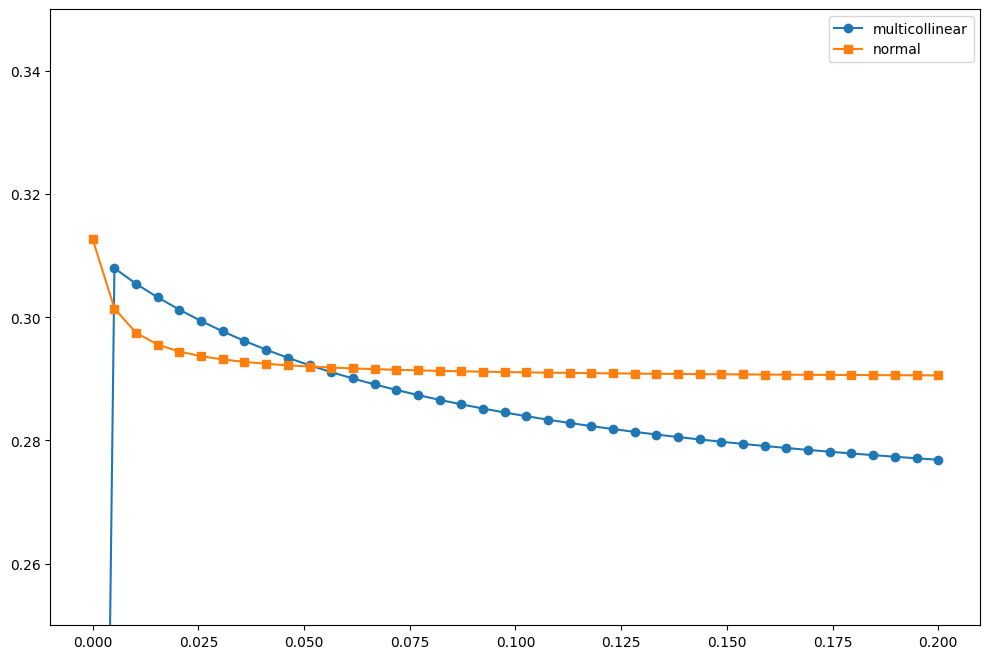

In [48]:
plt.plot(np.linspace(0, 0.2, 40), l_0, 'o-', label='multicollinear')
plt.plot(np.linspace(0, 0.2, 40), l_1, 's-', label='normal')
plt.ylim(0.25, 0.35)
plt.legend()

## Exercise 12.5

In [49]:
# the data
year       = [1534, 1737, 1803, 1928, 1960, 1975, 1987, 2023, 2057, 2100 ]
doubleTime = [ 697,  594,  260,  125,   76,   47,   37,   48,   70,  109 ]

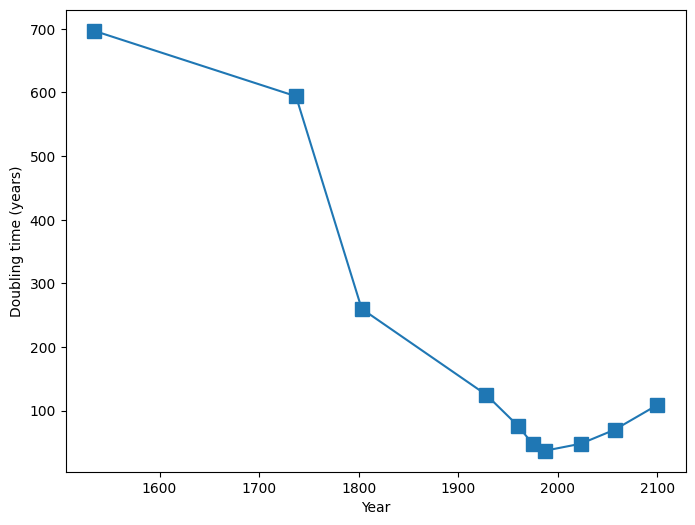

In [50]:
# plot it
plt.figure(figsize=(8,6))
plt.plot(year,doubleTime,'s-',markersize=10)

plt.xlabel('Year')
plt.ylabel('Doubling time (years)')
plt.savefig('Figure_12_06.png',dpi=300)
plt.show()

C:\Users\rfakhrutdinov\AppData\Local\Temp\ipykernel_10636\777633504.py:4: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(year, doubleTime, deg = i)


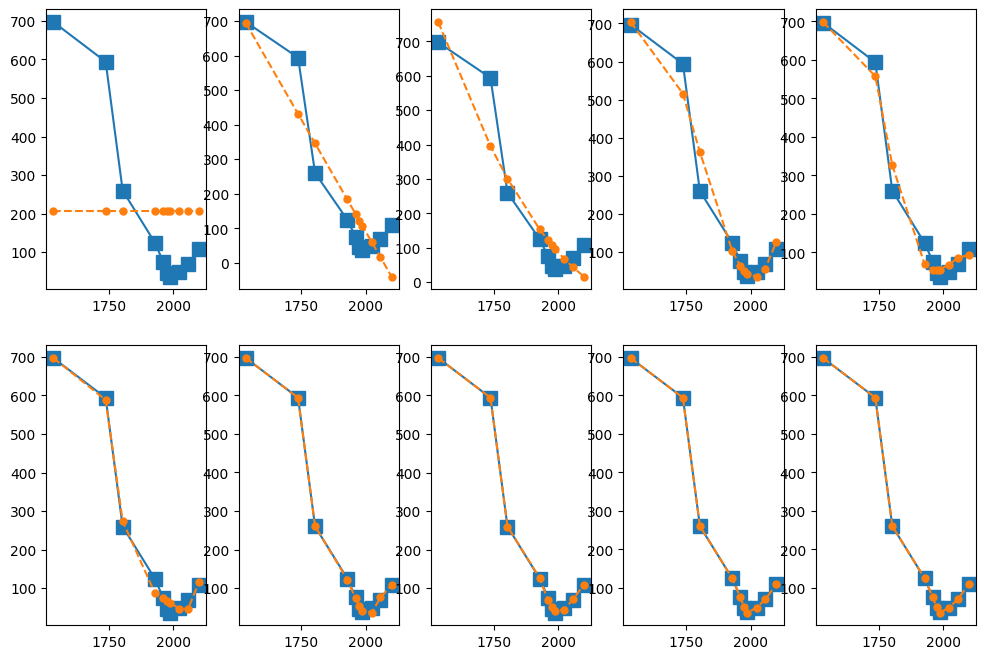

In [51]:
fig, ax = plt.subplots(2,5)

for i in range(10):
    coefs = np.polyfit(year, doubleTime, deg = i)
    prediction = np.polyval(coefs, year)    
    ax[i // 5, i % 5].plot(year,doubleTime,'s-', markersize=10)
    ax[i // 5, i % 5].plot(year, prediction, '.--', markersize=10)
    

## Exercise 12.6

In [52]:
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

X = sm.add_constant(numcourses)

In [53]:
beta = np.linalg.lstsq(X, happiness)[0]

C:\Users\rfakhrutdinov\AppData\Local\Temp\ipykernel_10636\1188782765.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(X, happiness)[0]


In [54]:
beta

array([23.13033815,  3.69820606])

In [55]:
def find_min(X):
    x_min = X.min()
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if X[i,j] == x_min:
                return i,j
            

In [56]:
intercepts = np.linspace(0,80,100)
slopes = np.linspace(0,6,100)

SSEs = np.zeros((len(intercepts),len(slopes)))

for i in range(len(intercepts)):
    for s in range(len(slopes)):
        prediction = X @ np.array([intercepts[i], slopes[s]])
        SSEs[i,s] = np.sum((happiness - prediction)**2)
        
i,s = find_min(SSEs)

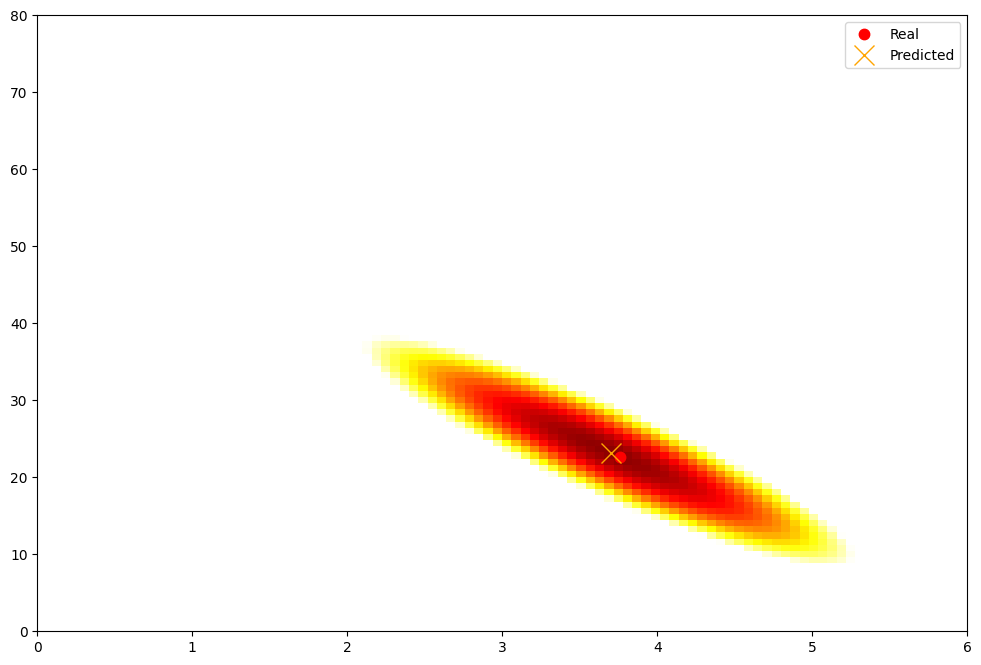

In [57]:
        
plt.imshow(SSEs, vmin=2000,vmax=3000, cmap='hot',
           extent=[slopes[0],slopes[-1],intercepts[0],intercepts[-1]],
           origin='lower',aspect='auto')



plt.plot(slopes[s], intercepts[i], 'r.', markersize=15, label='Real')
plt.plot(*beta[::-1], 'x', color='orange', markersize=15, label='Predicted')

plt.legend()

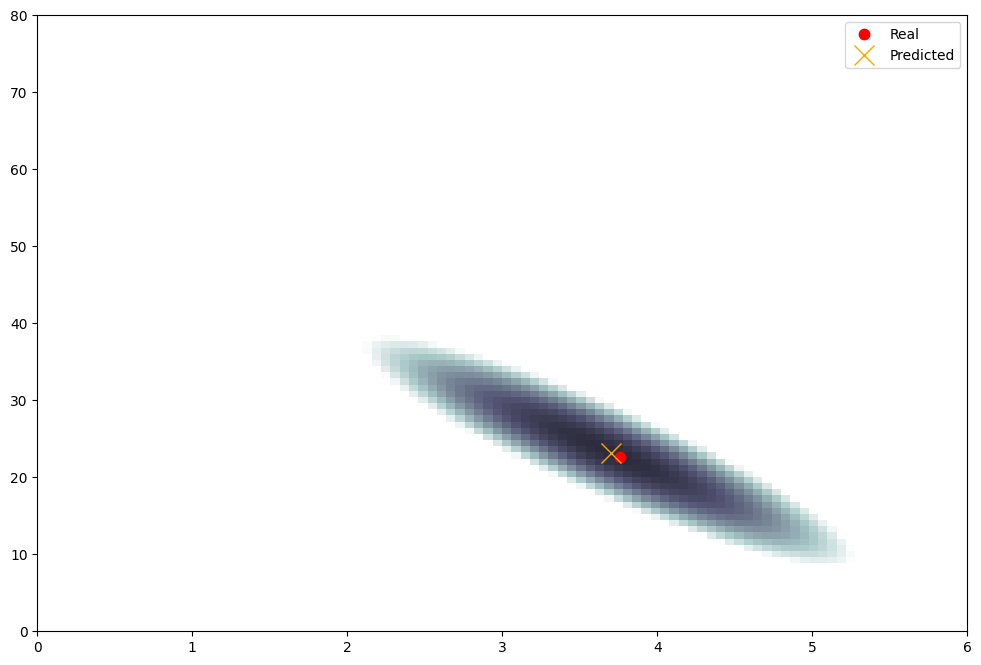

In [58]:
# Same but in bone cmap; I find it more aesthetically pleasing    
plt.imshow(SSEs, vmin=2000,vmax=3000, cmap='bone',
           extent=[slopes[0],slopes[-1],intercepts[0],intercepts[-1]],
           origin='lower',aspect='auto')



plt.plot(slopes[s], intercepts[i], 'r.', markersize=15, label='Real')
plt.plot(*beta[::-1], 'x', color='orange', markersize=15, label='Predicted')

plt.legend()